# StockX Consumer Region Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
# all figures will have figsize(10,5)
plt.rcParams["figure.figsize"] = [10, 5]

In [2]:
# load the data
fp = "~/Desktop/DATA/data1030_student_f20/final-project/data/StockX-Data.csv"
df = pd.read_csv(fp)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


## Initial Data Cleaning

In [3]:
df.shape

(99956, 8)

In [4]:
df.dtypes

# mostly categorical except Sale Price, Retail Price, Shoe Size
# Sale Price and Retail Price are of type 'object', probably because of the '$'

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

Our features are mostly categorical except `Sale Price`, `Retail Price`, and `Shoe Size`. `Sale Price` and `Retail Price` are of type 'object', probably because of the dollar sign in their values. 

In [5]:
# check for null/missing data
df.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

Next, we clean our data by removing all dollar signs and commas from the price data. It also prepares it for casting to numeric types. 

In [6]:
# remove $ and comma from price data
# prepare for casting
df['Sale Price'] = df['Sale Price'].str.replace(',', '')
df['Sale Price'] = df['Sale Price'].str.replace('$', '')
df['Retail Price'] = df['Retail Price'].str.replace(',', '')
df['Retail Price'] = df['Retail Price'].str.replace('$', '')

In [7]:
# typecast Sale Price and Retail Price to float64
# cast Order Date and Release Date to datetimes
df['Sale Price'] = pd.to_numeric(df['Sale Price'], errors = 'coerce')
df['Retail Price'] = pd.to_numeric(df['Retail Price'], errors = 'coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])
print(df.dtypes)

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


In [8]:
# rename columns to remove spaces 
df = df.rename(columns = {
    "Order Date": "Order_Date", 
    "Sneaker Name": "Sneaker_Name", 
    "Sale Price": "Sale_Price", 
    "Retail Price": "Retail_Price", 
    "Release Date": "Release_Date", 
    "Shoe Size": "Shoe_Size", 
    "Buyer Region": "Buyer_Region"
})
df.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island


In [9]:
# cast sale price and retail price as float64
df = df.astype({'Sale_Price':'float64', 'Retail_Price':'float64'})

## EDA

In [10]:
df.describe()

,Sale_Price,Retail_Price,Shoe_Size
count,99956.000000,99956.00000,99956.000000
mean,446.634719,208.61359,9.344181
std,255.982969,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


In [11]:
# describe categorical variables
for (col_name, col_val) in df.iteritems(): 
    if col_name != 'Sale_Price' and col_name != 'Retail_Price' and col_name != 'Shoe_Size' \
    and col_name != 'Buyer_Region':
        print(col_name, '\n', df[col_name].value_counts())
        print('\n')

Order_Date 
 2018-11-16    1388
2018-11-23    1262
2018-12-27    1034
2018-06-30    1033
2019-02-07     893
              ... 
2017-10-16      10
2017-10-22       9
2017-10-15       8
2017-10-19       8
2017-10-29       8
Name: Order_Date, Length: 531, dtype: int64


Brand 
  Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64


Sneaker_Name 
 adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                 

In [12]:
# explore properties of target variable
# number of unique buyer regions 
# number of sales per region

print("Number of unique buyer regions: ", df['Buyer_Region'].nunique())
df['Buyer_Region'].value_counts()

# 51 unique buyer regions is a lot
# having this many classifiers may complicate the ML pipeline down the line (?)

Number of unique buyer regions:  51


California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  412
Hawaii    

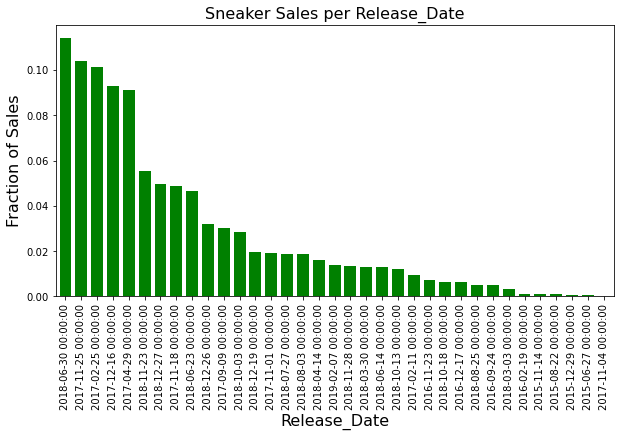

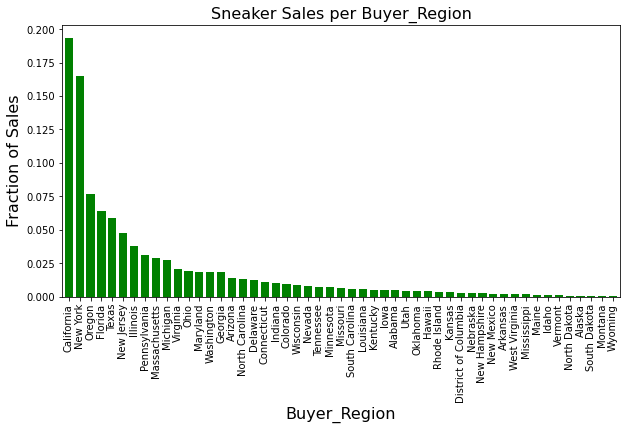

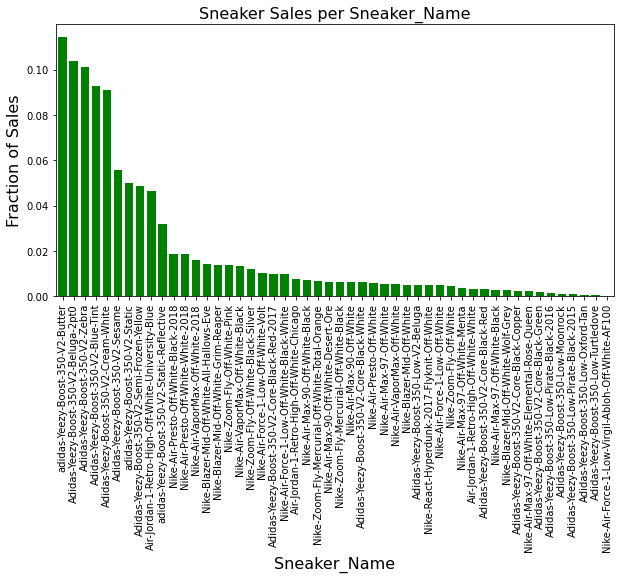

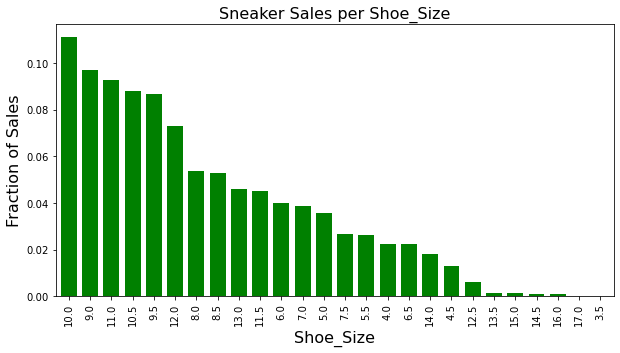

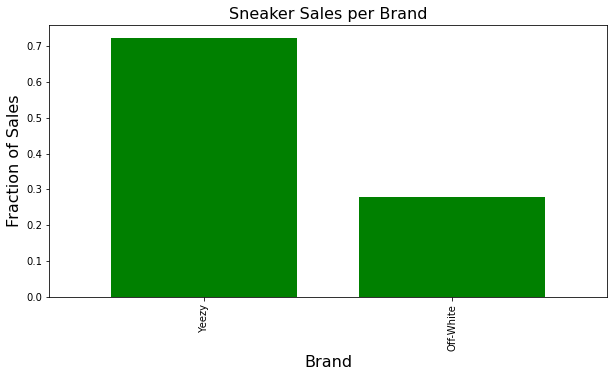

In [40]:
# distributions for release date, buyer region, sneaker name, shoe size, and brand
# create normalized pie plots for buyer region and shoe size 

# pay special attention to buyer region

cats = ['Release_Date', 'Buyer_Region', 'Sneaker_Name', 'Shoe_Size', 'Brand']
for cat in cats: 
    plot = pd.value_counts(df[str(cat)], normalize = True).plot.bar(color = 'green', width = 0.75)
    plt.title("Sneaker Sales per %s" % (cat), fontsize = 16)
    plt.xlabel("%s" % (cat), fontsize = 16, ha = 'center')
    plt.ylabel("Fraction of Sales", fontsize = 16, ha = 'center')
    plt.savefig('figures/SneakerSalesPer{}.png'.format(cat), bbox_inches = 'tight')
    plt.show()

Our original target variable, **Buyer Region**, has 51 unique classifiers. Using this many classifiers in our final model is likely to cause complications later in the supervised ML pipeline, so I will then consolidate these regions into 4 **US Regions**. These four regions are based on US Census Bureau-designated regions and divisions.

In [13]:
# creating a new column called 'US_Region' 
# reduces number of unique classifiers in target variable
# regions are based on Census Bureau-designated regions and divisions
us_regions = []
for index, row in df.iterrows():
    if row['Buyer_Region'] == "Connecticut" or \
    row['Buyer_Region'] == 'Maine' or \
    row['Buyer_Region'] == 'Massachusetts' or \
    row['Buyer_Region'] == 'New Hampshire' or \
    row['Buyer_Region'] == 'Rhode Island' or \
    row['Buyer_Region'] == 'Vermont' or \
    row['Buyer_Region'] == 'New Jersey' or \
    row['Buyer_Region'] == 'New York' or \
    row['Buyer_Region'] == 'Pennsylvania':
        us_regions.append('Northeast')
    elif row['Buyer_Region'] == 'Illinois' or \
    row['Buyer_Region'] == 'Indiana' or \
    row['Buyer_Region'] == 'Michigan' or \
    row['Buyer_Region'] == 'Ohio' or \
    row['Buyer_Region'] == 'Wisconsin' or \
    row['Buyer_Region'] == 'Iowa' or \
    row['Buyer_Region'] == 'Kansas' or \
    row['Buyer_Region'] == 'Minnesota' or \
    row['Buyer_Region'] == 'Missouri' or \
    row['Buyer_Region'] == 'Nebraska' or \
    row['Buyer_Region'] == 'North Dakota' or \
    row['Buyer_Region'] == 'South Dakota':
        us_regions.append('Midwest')
    elif row['Buyer_Region'] == 'Arizona' or \
    row['Buyer_Region'] == 'Colorado' or \
    row['Buyer_Region'] == 'Idaho' or \
    row['Buyer_Region'] == 'Montana' or \
    row['Buyer_Region'] == 'Nevada' or \
    row['Buyer_Region'] == 'New Mexico' or \
    row['Buyer_Region'] == 'Utah' or \
    row['Buyer_Region'] == 'Wyoming' or \
    row['Buyer_Region'] == 'Alaska' or \
    row['Buyer_Region'] == 'California' or \
    row['Buyer_Region'] == 'Hawaii' or \
    row['Buyer_Region'] == 'Oregon' or \
    row['Buyer_Region'] == 'Washington': 
        us_regions.append('West')
    else: 
        us_regions.append('South')

df['US_Region'] = us_regions

In [14]:
df.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,US_Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,West
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,West
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,West
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,South
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,Northeast


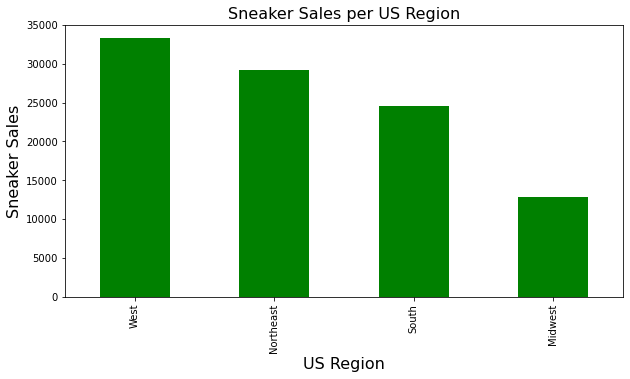

In [39]:
pd.value_counts(df['US_Region']).plot.bar(color = 'green')
plt.title('Sneaker Sales per US Region', fontsize = 16)
plt.xlabel('US Region', fontsize = 16)
plt.ylabel('Sneaker Sales', fontsize = 16)
plt.savefig('figures/SneakerSalesPerUSRegion.png', dpi = 300, bbox_inches = 'tight')
plt.show()

/Users/kevin18le/opt/anaconda3/envs/data1030-kevinle/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


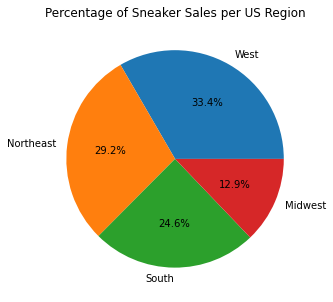

In [16]:
# create normalized pie charts for US region

# formats proportions into percentages
def func(pct, allvals): 
    return "{:.1f}%".format(pct)

fig, ax = plt.subplots()
Z = pd.value_counts(df['US_Region'], normalize = True)
ax.pie(Z.values, labels = Z.index, autopct = lambda pct: func(pct, Z.values))
plt.title('Percentage of Sneaker Sales per US Region')
plt.savefig('figures/SalesPerRegionPie.png', dpi = 300, bbox_inches = 'tight')
fig.show()

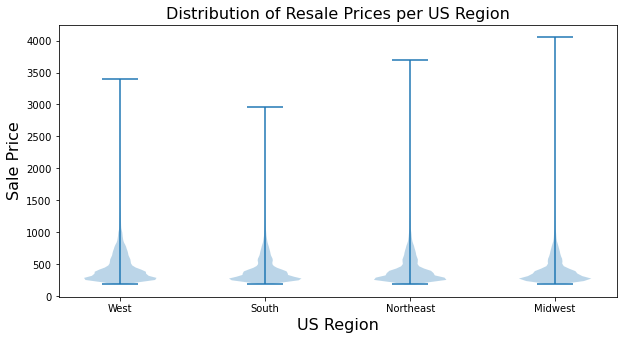

In [18]:
# Distribution of Sale Price based on US Region
cat = df['US_Region'].unique()
dataset = [df[df['US_Region'] == cat[0]]['Sale Price'].values, \
          df[df['US_Region'] == cat[1]]['Sale Price'].values, \
          df[df['US_Region'] == cat[2]]['Sale Price'].values, \
          df[df['US_Region'] == cat[3]]['Sale Price'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1, 2, 3, 4], [cat[0], cat[1], cat[2], cat[3]])
plt.title('Distribution of Resale Prices per US Region', fontsize = 16)
plt.xlabel('US Region', fontsize = 16)
plt.ylabel('Sale Price', fontsize = 16)
plt.savefig('figures/SalePricePerRegionViolin.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# proportion of sales per brand based on US Region
count_matrix = df.groupby(['US_Region', 'Brand']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis = 0)
print(count_matrix_norm)

Brand         Yeezy  Off-White
US_Region                     
Midwest    0.753210   0.246790
Northeast  0.737376   0.262624
South      0.729658   0.270342
West       0.690700   0.309300


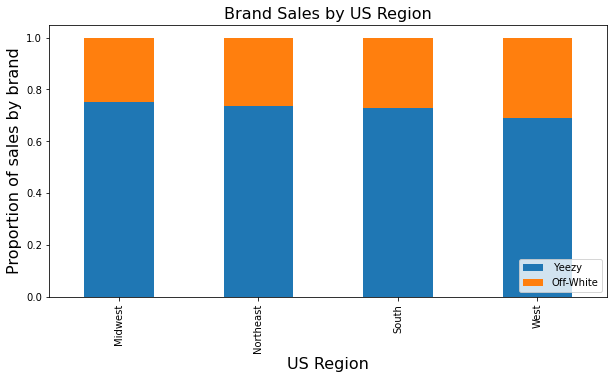

In [20]:
count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.ylabel('Proportion of sales by brand', fontsize = 16)
plt.xlabel('US Region', fontsize = 16)
plt.title('Brand Sales by US Region', fontsize = 16)
plt.legend(loc = 4)
plt.savefig('figures/BrandSalesPerRegion.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# trend between US buyer region and average sale price
reg = df[['US_Region', 'Sale Price']]
un_reg = df['US_Region'].value_counts().index.tolist()
avg = []

for region in un_reg:
    row = reg.loc[reg['US_Region'] == str(region)]
    avg.append(row['Sale Price'].mean())

regions = pd.Series(un_reg)
averages = pd.Series(avg)
avgprice_df = pd.DataFrame(columns = ['US_Region', 'Average Price'])
avgprice_df['US_Region'] = regions
avgprice_df['Average Price'] = averages

avgprice_df.head()

,US_Region,Average Price
0,West,470.753478
1,Northeast,438.325666
2,South,434.590114
3,Midwest,425.927621


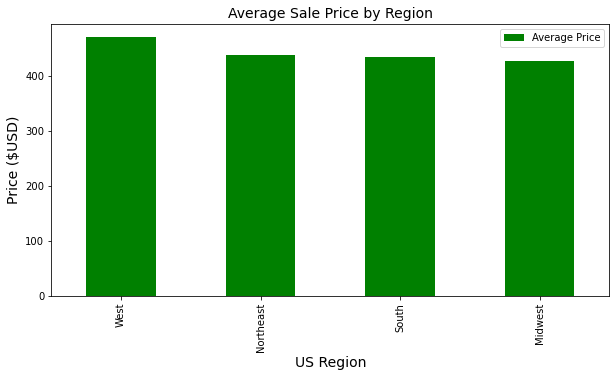

In [22]:
avgprice_df.plot(kind = 'bar', x = 'US_Region', color = 'green')
plt.title('Average Sale Price by Region', fontsize = 14)
plt.xlabel('US Region', fontsize = 14)
plt.ylabel('Price ($USD)', fontsize = 14)
plt.savefig('figures/AveragePricePerRegion.png', dpi=300, bbox_inches='tight')
plt.show()

## Preprocessing

We are going to split the data using a basic `train_test_split()`, followed by a shuffled `KFold` split. 60% of the data will belong to the training set, 20% to the validation set, and 20% to the test set. 

**Notes:**
- Our dataset is IID
- Doesn't have group structure. Each sale is its own distinct entity.
- Not time series. Even though each sale has a specific date, the date doesn't have an impact on the data during data collection. Every sale is time-independent. 
- continuous features will be preprocessed with StandardScaler
- categorical features will be processed with OneHotEncoder
- target feature (US_Region/Buyer_Region) will be preprocessed with a LabelEncoder

We'll be applying our ML models on two different target variables, `Buyer_Region`, which was a part of the original dataset, and `US_Region`, which I created on my own to reduce the number of labels in our target variable. 

Since there are few release dates, `Release_Date` will be treated as a categorical variable. On the other hand, since there are many unique order dates (over 500), `Order_Date` will be treated as a continuous variable. 

## Evaluation metric
Since our data is IID, does not have group structure, and balanced, we'll be using **accuracy** as our evaluation metric. Accuracy is defined as the fraction of all data points that are correctly classified. 

## ML algorithms
We'll be applying a variety of ML algorithms, including a simple logistic regression, support vector classifier, random forest classifier, and XGBoost classifier.

All hyperparameters will be tuned using GridSearchCV. 

In [15]:
# splitting libraries
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
# preprocessors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder


# separate feature matrix and target variable 
y1 = df['US_Region']
y1 = LabelEncoder().fit_transform(y1)
X1 = df.loc[:, df.columns != 'US_Region']
X1 = X1.drop(columns=['Buyer_Region'])
# X1.head()

y2 = df['Buyer_Region']
y2 = LabelEncoder().fit_transform(y2)
X2 = df.loc[:, df.columns != 'Buyer_Region']
X2 = X2.drop(columns=['US_Region'])
X2.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0


In [16]:
# first we need to convert Order_Date into an ordinal
X1.loc[:, 'Order_Date'] = X1['Order_Date'].apply(lambda x: x.toordinal())
#X1.head()
X2.loc[:, 'Order_Date'] = X2['Order_Date'].apply(lambda x: x.toordinal())

In [20]:
# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
# cross-validation
from sklearn.model_selection import GridSearchCV
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# the function below is defined for algorithms on sklearn
# GOAL: determine the best model parameters on a subsample of data
# data is sampled via stratified subsampling

# returns grid with best parameter and best CV score
def ML_pipeline_kfold_GridSearchCV_y1(X, y, preprocessor, ML_algo, param_grid, random_state):
    '''
    This function splits the data into other/test (80/20) and applies StratifiedKFold with 4 folds to other. 
    The accuracy_score is maximized using GridSearchCV.
    ''' 
    # split data to other/test 80/20, and the use StratifiedKFold with 4 folds
    #X_other, X_test, y_other, y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
    kf = StratifiedKFold(n_splits = 5,shuffle=True,random_state=random_state)

    # make_pipeline is a streamlined way to fit_transform() the train set 
    # and transform() the validation set 
    pipe = make_pipeline(preprocessor, ML_algo)

    # loop through the hyperparameter combinations using GridSearchCV
    grid = GridSearchCV(pipe, param_grid = param_grid, scoring = 'accuracy',
                       cv = kf, return_train_score = True, n_jobs=-1)
    #grid.fit(X_other, y_other)
    grid.fit(X, y)
        
    best_params = grid.best_params_
    best_val_score = grid.best_score_
        
    return best_params, best_val_score 

In [18]:
# prepare preprocessors

onehot_ftrs = ['Brand', 'Sneaker_Name', 'Release_Date']
std_ftrs = ['Retail_Price', 'Sale_Price']
minmax_ftrs = ['Shoe_Size', 'Order_Date']

# collect all encoders
preprocessor = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs), 
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

In [21]:
# apply logistic regression 
ML_algo = LogisticRegression()

# tune l1 and/or l2 reg
param_grid = {
    'logisticregression__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
    'logisticregression__penalty': ['l1', 'l2']
}

# sample the data using stratified random sample 
# using 25,000 rows to find the best parameters
N = 25000
X1_sample = X1.groupby('Sneaker_Name', group_keys=False).apply(lambda x: \
                                                               x.sample(int(np.rint(N*len(x)/len(X1))))).sample(frac=1).reset_index(drop=True)
y1_sample = np.random.choice(y1, size=25000, replace=False)
params, val_score = ML_pipeline_kfold_GridSearchCV_y1(X1_sample, y1_sample, preprocessor, ML_algo, param_grid, 84)
print('best model: ', params, '\n')
print('best validation score: ', val_score, '\n')

best model:  {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'} 

best validation score:  0.33575999999999995 



In [24]:
# apply model to the rest of the data

logreg = LogisticRegression(penalty='l2', C=0.001)

nr_states = 5
logreg_test_scores_y1 = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    logreg.fit(X_train_prep, y_train)
    y_test_pred = logreg.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    logreg_test_scores_y1[i] = score
print('Logistic regression test score: ', np.around(np.mean(logreg_test_scores_y1),3), '+/-', np.around(np.std(logreg_test_scores_y1),3))

Logistic regression test score:  0.349 +/- 0.003


In [25]:
# save output for logistic regression model 
import joblib 
file = "logreg_results.joblib"
joblib.dump(logreg, file + '.compressed', compress=True) 

['logreg_results.joblib.compressed']

In [26]:
# apply linear support vector classifier

# linear svc but applied in terms of liblinear rather than libsvm
# more flexibility in choice of penalties and loss functions and should scale better
# to large number of samples

from sklearn.svm import LinearSVC
ML_algo = LinearSVC(loss='hinge')

# tune C
param_grid = {
    'linearsvc__C': np.logspace(-4, 4, num=8) # logspaced
}

# stratified random sampling
N = 25000
X1_sample = X1.groupby('Sneaker_Name', group_keys=False).apply(lambda x: \
                                                               x.sample(int(np.rint(N*len(x)/len(X1))))).sample(frac=1).reset_index(drop=True)
y1_sample = np.random.choice(y1, size=25000, replace=False)

svc_params, svc_val_score = ML_pipeline_kfold_GridSearchCV_y1(X1_sample, y1_sample, preprocessor, ML_algo, param_grid, 23*9)
print('best model: ', svc_params, '\n')
print('best validation score: ', svc_val_score, '\n')

best model:  {'linearsvc__C': 0.0001} 

best validation score:  0.3327 



In [27]:
# apply model to the rest of the data
lin_svc = LinearSVC(C=0.0001, loss='hinge')

nr_states = 5
linsvc_test_y1 = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    lin_svc.fit(X_train_prep, y_train)
    y_test_pred = lin_svc.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    linsvc_test_y1[i] = score
print('Linear SVC test score: ', np.around(np.mean(linsvc_test_y1), 3), '+/-', np.around(np.std(linsvc_test_y1), 3))

Linear SVC test score:  0.35 +/- 0.003


In [28]:
file = "linsvc_results.joblib"
joblib.dump(lin_svc, file + '.compressed', compress=True)

['linsvc_results.joblib.compressed']

In [29]:
# apply random forest
ML_algo = RandomForestClassifier(n_estimators=100, n_jobs=-1)
param_grid = {'randomforestclassifier__max_depth': [int(x) for x in np.linspace(10,110, num=11)],
             'randomforestclassifier__max_features': [0.5, 0.75, 1.0]}

N = 25000
X1_sample = X1.groupby('Sneaker_Name', group_keys=False).apply(lambda x: \
                                                               x.sample(int(np.rint(N*len(x)/len(X1))))).sample(frac=1).reset_index(drop=True)
y1_sample = np.random.choice(y1, size=25000, replace=False)

rf_params, rf_val_score = ML_pipeline_kfold_GridSearchCV_y1(X1_sample, y1_sample, preprocessor, ML_algo, param_grid, 940)
print('best model: ', rf_params)
print('best validation score: ', rf_val_score)

best model:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.75}
best validation score:  0.33194999999999997


In [30]:
# apply model to the rest of the data
rfc = RandomForestClassifier(max_depth = 10, max_features=0.75, n_estimators=100, n_jobs=-1)

nr_states = 5
rf_test_y1 = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    rfc.fit(X_train_prep, y_train)
    y_test_pred = rfc.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    rf_test_y1[i] = score
print('Random Forest Classifier test score: ', np.around(np.mean(rf_test_y1), 3), '+/-', np.around(np.std(rf_test_y1), 3))
file = 'rfc_results.joblib'
joblib.dump(rfc, file + '.compressed', compress=True)

Random Forest Classifier test score:  0.37 +/- 0.002


['rfc_results.joblib.compressed']

In [31]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

ML_algo = KNeighborsClassifier(weights='distance', n_jobs=-1)
param_grid = {'kneighborsclassifier__n_neighbors': [500, 1000, 2000]}

N = 25000
X1_sample = X1.groupby('Sneaker_Name', group_keys=False).apply(lambda x: \
                                                               x.sample(int(np.rint(N*len(x)/len(X1))))).sample(frac=1).reset_index(drop=True)
y1_sample = np.random.choice(y1, size=25000, replace=False)

knn_params, knn_val_score = ML_pipeline_kfold_GridSearchCV_y1(X1_sample, y1_sample, preprocessor, ML_algo, param_grid, 200)
print('best model: ', knn_params)
print('best validation score: ', knn_val_score)

best model:  {'kneighborsclassifier__n_neighbors': 2000}
best validation score:  0.31645


In [32]:
# apply model to the rest of the data
knn = KNeighborsClassifier(weights='distance', n_neighbors=2000, n_jobs=-1)

nr_states = 5
knn_test_y1 = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    knn.fit(X_train_prep, y_train)
    y_test_pred = knn.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    knn_test_y1[i] = score
print('K-nearest test score: ', np.around(np.mean(knn_test_y1), 3), '+/-', np.around(np.std(knn_test_y1), 3))
file = 'knn_results.joblib'
joblib.dump(knn, file + 'compressed', compress=True)

K-nearest test score:  0.353 +/- 0.003


['knn_results.joblibcompressed']

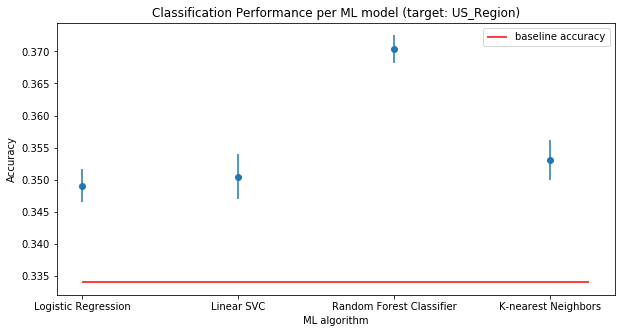

In [33]:
# collect means and standard deviations of each algorithm
algos = ['Logistic Regression', 'Linear SVC', 'Random Forest Classifier', 'K-nearest Neighbors']
means = [np.mean(logreg_test_scores_y1), np.mean(linsvc_test_y1), np.mean(rf_test_y1), np.mean(knn_test_y1)]
devs = [np.std(logreg_test_scores_y1), np.std(linsvc_test_y1), np.std(rf_test_y1), np.std(knn_test_y1)]

plt.errorbar(x=algos, y=means, yerr=devs, fmt='o')
plt.xlabel('ML algorithm', ha='center')
plt.ylabel('Accuracy')
plt.hlines(y=0.334, xmin=0, xmax=3.25, color='red', label = 'baseline accuracy')
plt.title('Classification Performance per ML model (target: US_Region)')
plt.legend()
plt.savefig('PerformanceUS_Region.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# apply logistic regression on y2 (target: Buyer_Region)
ML_algo = LogisticRegression()

# tune l1 and/or l2 reg
param_grid = {
    'logisticregression__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
    'logisticregression__penalty': ['l1', 'l2']
}

# sample the data using stratified random sample 
# using 25,000 rows to find the best parameters
N = 25000
X2_sample = X2.groupby('Sneaker_Name', group_keys=False).apply(lambda x: \
                                                               x.sample(int(np.rint(N*len(x)/len(X2))))).sample(frac=1).reset_index(drop=True)
y2_sample = np.random.choice(y2, size=25000, replace=False)
params, val_score = ML_pipeline_kfold_GridSearchCV_y1(X2_sample, y2_sample, preprocessor, ML_algo, param_grid, 84)
print('best model: ', params, '\n')
print('best validation score: ', val_score, '\n')

best model:  {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'} 

best validation score:  0.19335 



In [35]:
# apply logistic regression on y2 (target: Buyer_Region)
ML_algo = LogisticRegression()

# tune l1 and/or l2 reg
param_grid = {
    'logisticregression__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
    'logisticregression__penalty': ['l1', 'l2']
}

# sample the data using stratified random sample 
# using 25,000 rows to find the best parameters
N = 25000
X2_sample = X2.groupby('Sneaker_Name', group_keys=False).apply(lambda x: \
                                                               x.sample(int(np.rint(N*len(x)/len(X2))))).sample(frac=1).reset_index(drop=True)
y2_sample = np.random.choice(y2, size=25000, replace=False)
params, val_score = ML_pipeline_kfold_GridSearchCV_y1(X2_sample, y2_sample, preprocessor, ML_algo, param_grid, 84)
print('best model: ', params, '\n')
print('best validation score: ', val_score, '\n')

best model:  {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'} 

best validation score:  0.19185 



/Users/kevin18le/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# apply model to the rest of the data

logreg = LogisticRegression(penalty='l2', C=0.001)

nr_states = 5
logreg_test_scores = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    logreg.fit(X_train_prep, y_train)
    y_test_pred = logreg.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    logreg_test_scores[i] = score
print('Logistic regression test score (target Buyer_Region): ', np.around(np.mean(logreg_test_scores),3), '+/-', np.around(np.std(logreg_test_scores),3))

Logistic regression test score (target Buyer_Region):  0.196 +/- 0.003


In [37]:
ML_algo = LinearSVC(loss='hinge')

# tune C
param_grid = {
    'linearsvc__C': np.logspace(-4, 4, num=8) # logspaced
}

# stratified random sampling
N = 25000
X2_sample = X2.groupby('Sneaker_Name', group_keys=False).apply(lambda x: \
                                                               x.sample(int(np.rint(N*len(x)/len(X1))))).sample(frac=1).reset_index(drop=True)
y2_sample = np.random.choice(y2, size=25000, replace=False)

svc_params, svc_val_score = ML_pipeline_kfold_GridSearchCV_y1(X2_sample, y2_sample, preprocessor, ML_algo, param_grid, 23*9)
print('best model: ', svc_params, '\n')
print('best validation score: ', svc_val_score, '\n')

best model:  {'linearsvc__C': 0.0001} 

best validation score:  0.18855 



In [38]:
lin_svc = LinearSVC(C=0.0001, loss='hinge')

nr_states = 5
linsvc_test = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    lin_svc.fit(X_train_prep, y_train)
    y_test_pred = lin_svc.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    linsvc_test[i] = score
print('Linear SVC test score (target Buyer_Region): ', np.around(np.mean(linsvc_test), 3), '+/-', np.around(np.std(linsvc_test), 3))

Linear SVC test score (target Buyer_Region):  0.197 +/- 0.002


In [39]:
# apply random forest
ML_algo = RandomForestClassifier(n_estimators=100, n_jobs=-1)
param_grid = {'randomforestclassifier__max_depth': [int(x) for x in np.linspace(10,110, num=11)],
             'randomforestclassifier__max_features': [0.5, 0.75, 1.0]}

rf_params, rf_val_score = ML_pipeline_kfold_GridSearchCV_y1(X2_sample, y2_sample, preprocessor, ML_algo, param_grid, 940)
print('best model: ', rf_params)
print('best validation score: ', rf_val_score)

best model:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.75}
best validation score:  0.19014999999999999


In [23]:
# apply model to the rest of the data
rfc = RandomForestClassifier(max_depth = 10, max_features=0.75, n_estimators=100, n_jobs=-1)

nr_states = 5
rf_test = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    rfc.fit(X_train_prep, y_train)
    y_test_pred = rfc.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    rf_test[i] = score
print('Random Forest Classifier test score (target Buyer_Region): ', np.around(np.mean(rf_test), 3), '+/-', np.around(np.std(rf_test), 3))

Random Forest Classifier test score (target Buyer_Region):  0.216 +/- 0.004


In [41]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

ML_algo = KNeighborsClassifier(weights='distance', n_jobs=-1)
param_grid = {'kneighborsclassifier__n_neighbors': [500, 1000, 2000]}

knn_params, knn_val_score = ML_pipeline_kfold_GridSearchCV_y1(X2_sample, y2_sample, preprocessor, ML_algo, param_grid, 200)
print('best model: ', knn_params)
print('best validation score: ', knn_val_score)

best model:  {'kneighborsclassifier__n_neighbors': 2000}
best validation score:  0.18235


In [42]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=2000, n_jobs=-1)

nr_states = 5
knn_test = np.zeros(nr_states)
for i in range(nr_states):
    # first split to separate out the training set
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, random_state = 42*i)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    knn.fit(X_train_prep, y_train)
    y_test_pred = knn.predict(X_test_prep)
    score = accuracy_score(y_test, y_test_pred)
    knn_test[i] = score
print('K-nearest test score: ', np.around(np.mean(knn_test), 3), '+/-', np.around(np.std(knn_test), 3))

K-nearest test score:  0.194 +/- 0.002


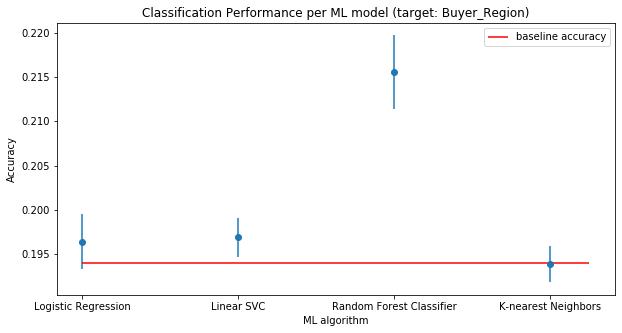

In [43]:
algos = ['Logistic Regression', 'Linear SVC', 'Random Forest Classifier', 'K-nearest Neighbors']
means = [np.mean(logreg_test_scores), np.mean(linsvc_test), np.mean(rf_test), np.mean(knn_test)]
devs = [np.std(logreg_test_scores), np.std(linsvc_test), np.std(rf_test), np.std(knn_test)]

plt.errorbar(x=algos, y=means, yerr=devs, fmt='o')
plt.xlabel('ML algorithm')
plt.ylabel('Accuracy')
plt.hlines(y=0.194, xmin=0, xmax=3.25, color='red', label = 'baseline accuracy')
plt.title('Classification Performance per ML model (target: Buyer_Region)')
plt.legend()
plt.savefig('PerformanceBuyer_Region.png', dpi=300, bbox_inches='tight')
plt.show()

## Global and local feature importances
Here we calculate perturbation feature importances and SHAP values and create summary plots to measure and visualize feature importances. This could provide insight behind the potential reasons why our models severely underfit the data. 

We explore global feature importances with respect to `US_Region` as our target variable.

In [25]:
# global feature importances for Random Forest Classifier
np.random.seed(42)
nr_runs = 10

X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.8, random_state = 42*i)
X_train_prep = preprocessor.fit_transform(X_train)
ftr_names = list(preprocessor.named_transformers_['onehot'].get_feature_names(onehot_ftrs))+ \
                preprocessor.transformers_[1][-1] + \
                preprocessor.transformers_[2][-1]

X_test_prep = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=X_test_prep, columns=ftr_names)

rfc.fit(X_train_prep, y_train)
test_score = rfc.score(X_test_prep, y_test)

scores = np.zeros([len(ftr_names), nr_runs])
print('test score =', test_score)
# baseline: guessing the most populous label
print('test baseline = ', np.sum(y_test == 3)/len(y_test))

# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = df_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(df_test[ftr_names[i]].values)
        acc_scores.append(rfc.score(X_test_shuffled, y_test))
    print('   shuffled test score:', np.around(np.mean(acc_scores), 3), '+/-', np.around(np.std(acc_scores), 3))
    scores[i] = acc_scores

test score = 0.37034813925570226
test baseline =  0.32643057222889155
shuffling Brand_ Yeezy
   shuffled test score: 0.37 +/- 0.0
shuffling Brand_Off-White
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-Low-Moonrock
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-Low-Turtledove
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-Low-V2-Beluga
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-V2-Beluga-2pt0
   shuffled test score: 0.37 +/- 0.0
shuffling Sneaker_Name_Adidas-Yeezy-Boost-350-V2-Blue-Tint
   shuffled test score: 0.37 +/- 0.0
shuffling Snea

   shuffled test score: 0.337 +/- 0.002
shuffling Order_Date
   shuffled test score: 0.342 +/- 0.003
shuffling Retail_Price
   shuffled test score: 0.369 +/- 0.001
shuffling Sale_Price
   shuffled test score: 0.355 +/- 0.002


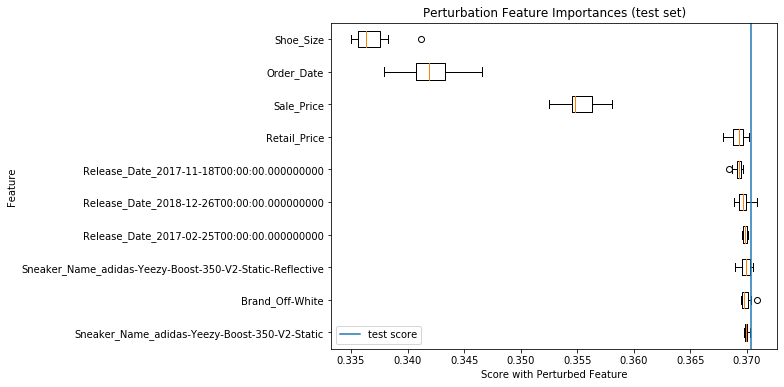

In [45]:
# perturbation feature importances

sorted_indcs = np.argsort(np.mean(scores, axis=1))[::1]
# extract the first 10 indices
sorted_indcs = np.array(sorted_indcs)[9::-1]
s = np.array(scores[sorted_indcs])

plt.figure(figsize=(8,6))
plt.boxplot(s.T, labels=np.array(ftr_names)[sorted_indcs],vert=False)
plt.axvline(test_score, label='test score')
plt.title("Perturbation Feature Importances (test set)")
plt.xlabel('Score with Perturbed Feature')
plt.ylabel('Feature')
plt.legend()
plt.savefig('PerturbationFtrImportance.png', dpi=300, bbox_inches='tight')
plt.show()

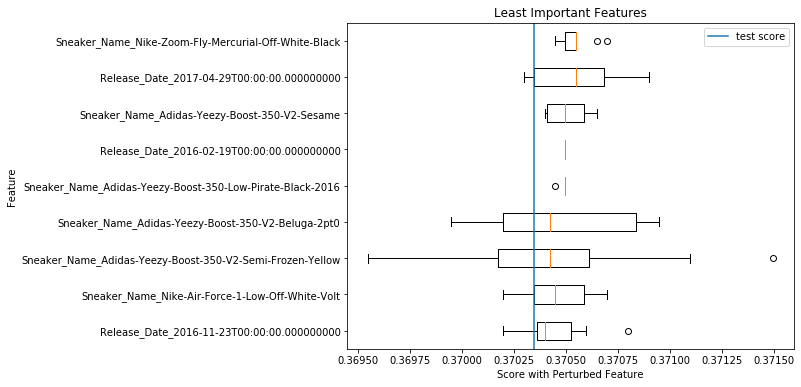

In [27]:
# 10 least important features
sorted_indcs = np.argsort(np.mean(scores, axis=1))[::1]
sorted_indcs = np.array(sorted_indcs)[-10:-1]
s = np.array(scores[sorted_indcs])

plt.figure(figsize=(8,6))
plt.boxplot(s.T, labels=np.array(ftr_names)[sorted_indcs],vert=False)
plt.axvline(test_score, label='test score')
plt.title("Least Important Features")
plt.xlabel('Score with Perturbed Feature')
plt.ylabel('Feature')
plt.legend()
plt.savefig('PerturbationFtrImportance.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
!pip install shap

In [47]:
# get SHAP values for random forest classifier 
import shap
d_test = df_test.sample(n=10)
explainer = shap.KernelExplainer(rfc.predict, d_test)

In [48]:
rf_shap_values = explainer.shap_values(df_test.sample(n=200))

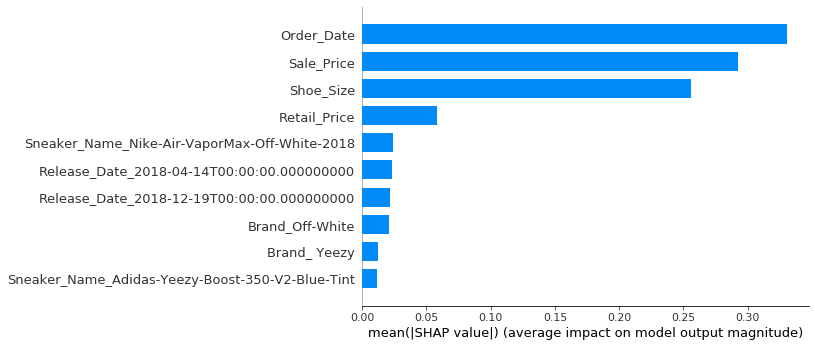

In [49]:
shap.summary_plot(rf_shap_values, df_test.sample(n=200), max_display=10, plot_type='bar', show=False)
plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')

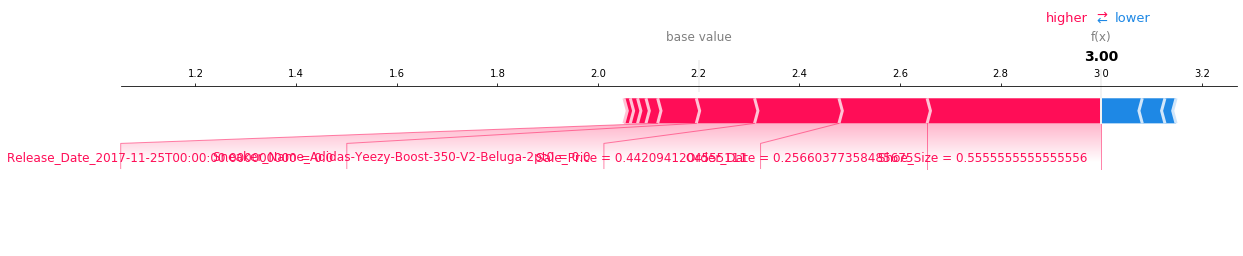

In [50]:
# explain point with index 0 
shap.initjs()
shap.force_plot(explainer.expected_value, rf_shap_values[0,:], df_test.iloc[0,:],show=False,matplotlib=True).savefig('forceplotpt0.png', dpi=300, bbox_inches='tight')

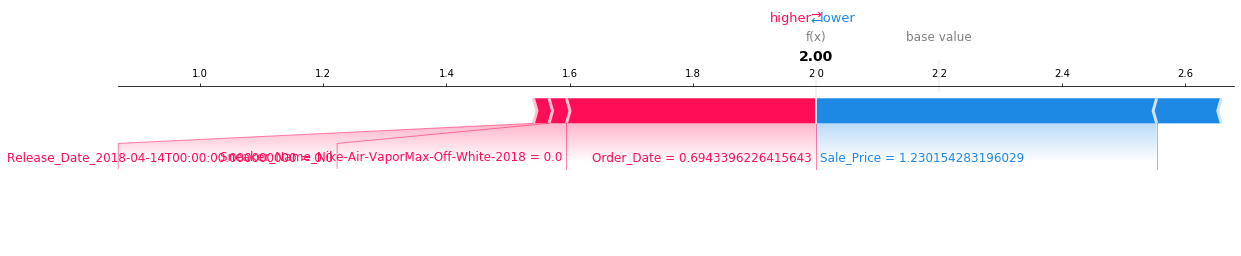

In [51]:
# explain point with index 100
shap.force_plot(explainer.expected_value, rf_shap_values[100,:], df_test.iloc[100,:],show=False,matplotlib=True).savefig('forceplotpt100.png', dpi=300, bbox_inches='tight')